In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
(train_img,train_label), (test_img,test_label) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_img.shape

(60000, 28, 28)

In [4]:
test_img.shape

(10000, 28, 28)

In [5]:
# 0 to 255 to 0 - 1
test_img = test_img / 255
train_img = train_img / 255

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), # 28x28 pixels images to 784 array
    keras.layers.Dense(520,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(train_img,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.4199 - accuracy: 0.8462
Epoch 2/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2789 - accuracy: 0.8972
Epoch 3/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.2355 - accuracy: 0.9119
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2017 - accuracy: 0.9245
Epoch 5/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1700 - accuracy: 0.9356
Epoch 6/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.1432 - accuracy: 0.9457
Epoch 7/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.1226 - accuracy: 0.9533
Epoch 8/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.1044 - accuracy: 0.9604
Epoch 9/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0859 - accuracy: 0.9677
Epoch 10/10
1875/1875 [==============================] 

In [9]:
model.evaluate(test_img,test_label)

313/313 [==============================] - 4s 12ms/step - loss: 0.3355 - accuracy: 0.9141


[0.3355258107185364, 0.9140999913215637]

In [10]:
classifications = model.predict(test_img)

313/313 [==============================] - 4s 12ms/step


In [11]:
labels = [
    'T-Shirt/Top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Boot'
]


Index: 49
Prediction: Pullover 
Aswer: Pullover


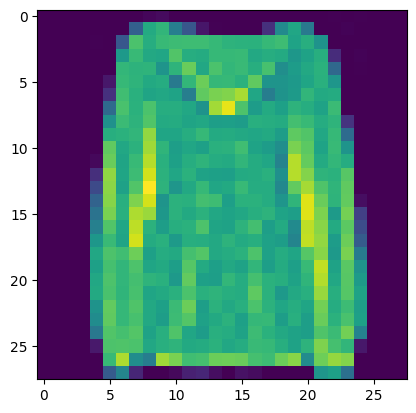

In [12]:
index = random.randint(0, 1000)
plt.imshow(test_img[index])
result = np.where(classifications[index] == max(classifications[index]))
print(f'\nIndex: {index}\nPrediction: {labels[result[0][0]]} \nAswer: {labels[test_label[index]]}')